In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Data Loading 

In [6]:
from sklearn.model_selection import train_test_split

# Load the dataset 
data = pd.read_csv('processed_data_Encoding.csv')

# Separate features and target
X = data.drop('y', axis=1) 
y = data['y']

# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Example: Check the shape of the datasets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")


X_train shape: (36168, 37)
X_test shape: (9043, 37)


smote

In [7]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

scaller 

In [8]:
from sklearn.preprocessing import StandardScaler

# Apply scaling only to the specified numerical columns
scaler = StandardScaler()
X_train_scaled= scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)


pca

In [9]:
# from sklearn.decomposition import PCA

# pca = PCA(n_components=0.95)

# X_train_pca = pca.fit_transform(X_train_scaled)
# X_test_pca = pca.transform(X_test_scaled)

RF model

Random Forest - Training Accuracy: 0.999843603378167
Random Forest - Test Accuracy: 0.8737144752847507
Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      7952
           1       0.46      0.29      0.36      1091

    accuracy                           0.87      9043
   macro avg       0.69      0.62      0.64      9043
weighted avg       0.85      0.87      0.86      9043



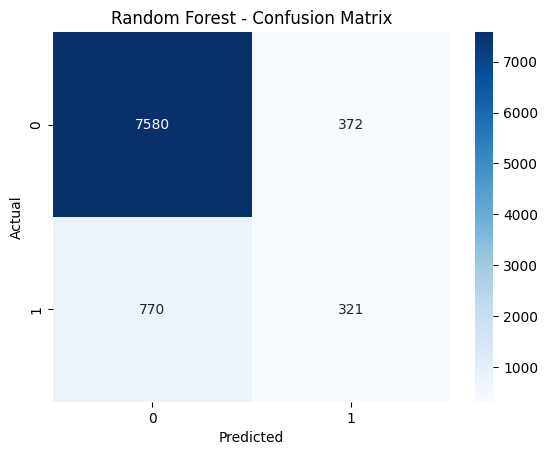

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the model
rf_model = RandomForestClassifier(random_state=42)

# rf_model = RandomForestClassifier(
#     n_estimators=200, 
#     max_depth=20, 
#     min_samples_split=10, 
#     min_samples_leaf=4, 
#     class_weight='balanced',
#     random_state=42
# )


# Train the model
rf_model.fit(X_train_scaled, y_train_res)

# Make predictions
rf_y_pred_train = rf_model.predict(X_train_scaled)
rf_y_pred_test = rf_model.predict(X_test_scaled)

# Evaluate
print("Random Forest - Training Accuracy:", accuracy_score(y_train_res, rf_y_pred_train))
print("Random Forest - Test Accuracy:", accuracy_score(y_test, rf_y_pred_test))

# Classification Report
print("Random Forest - Classification Report:")
print(classification_report(y_test, rf_y_pred_test))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, rf_y_pred_test)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Fitting 3 folds for each of 162 candidates, totalling 486 fits


c:\Users\wasif\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters: {'class_weight': 'balanced_subsample', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Random Forest Post-Tuning - Training Accuracy: 0.9998748827025337
Random Forest Post-Tuning - Test Accuracy: 0.8724980648015039
Random Forest Post-Tuning - Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      7952
           1       0.46      0.29      0.35      1091

    accuracy                           0.87      9043
   macro avg       0.68      0.62      0.64      9043
weighted avg       0.85      0.87      0.86      9043



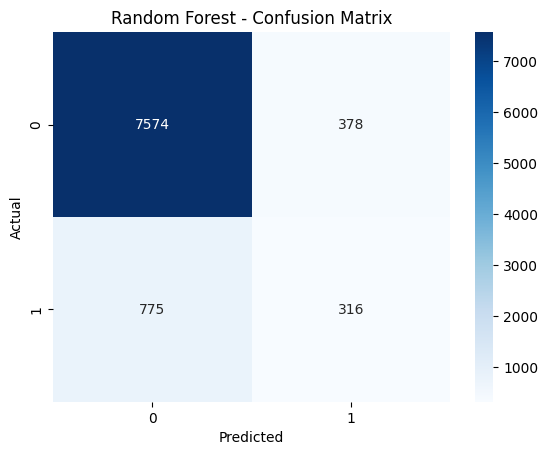

In [12]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced', 'balanced_subsample']
}
# param_grid = {
#     'n_estimators': [100, 300, 500, 700],        # Vary number of trees; more trees can stabilize predictions.
#     'max_depth': [10, 20, 30, None],            # Test deeper trees for complex relationships.
#     'min_samples_split': [2, 5, 10, 15],        # Experiment with more restrictive splits.
#     'min_samples_leaf': [1, 2, 4, 8],           # Larger leaf size helps regularize and prevents overfitting.
#     'max_features': ['sqrt', 'log2', 0.3, 0.5], # Test square root, log2, and fractions of features.
#     # 'bootstrap': [True, False],                 # Test bootstrap sampling or use the entire dataset.
#     'class_weight': ['balanced', 'balanced_subsample', None] # Compare auto-balancing vs. no weighting.
# }


# Initialize Random Forest and GridSearch
rf_model = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='f1', verbose=2, n_jobs=-1)

# Fit GridSearch
grid_search.fit(X_train_scaled, y_train_res)

# Best Parameters
print("Best Parameters:", grid_search.best_params_)

# Use the best model
best_rf_model = grid_search.best_estimator_


# Make predictions
rf_tune_y_pred_train = best_rf_model.predict(X_train_scaled)
rf_tune_y_pred_test = best_rf_model.predict(X_test_scaled)

# Evaluate
print("Random Forest Post-Tuning - Training Accuracy:", accuracy_score(y_train_res, rf_tune_y_pred_train))
print("Random Forest Post-Tuning - Test Accuracy:", accuracy_score(y_test, rf_tune_y_pred_test))

# Classification Report
print("Random Forest Post-Tuning - Classification Report:")
print(classification_report(y_test, rf_tune_y_pred_test))

## Confusion Matrix
conf_matrix = confusion_matrix(y_test, rf_tune_y_pred_test)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
